# ICE-NMF Evaluation ppf2

In [1]:
#imports
import numpy as np 
import csv
import re
import sys
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
import random
from sklearn.preprocessing import normalize
from numba import njit
from collections import defaultdict
import random
from implicit_data import ImplicitData
import numpy as np
from BISGD import BISGD
from ICE_NMF import ICE_NMF
from collections import defaultdict
from EvalPrequential import EvalPrequential
from datetime import datetime
import getopt
import pandas as pd

## Functions


In [2]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def sumvector(V,x):
    result = []
    for v in V:
        temp = v + x
        result.append(temp)
    return result    

def multvector(x,V):
    result = []
    for v in V:
        temp = v * x
        result.append(temp)
    return result    

def TransformVec(V):
  
    #new = normalize(V[:,np.newaxis], axis=0).ravel()
    for i in range(len(V)):
        V[i] = sigmoid(V[i])
    D = LA.norm(V)
    D=1/D
    new = D * V
  

    return new


## Get the data

In [15]:
sys.path.append('./')
configPath = 'config'
dataPath = 'ppf2.csv'

Data = []
with open(dataPath, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        Data.append([float(row[0]),float(row[1])])


In [16]:
Data_Transpose = np.transpose(Data)
stream = ImplicitData(Data_Transpose[0],Data_Transpose[1])



num_clusters = 20
overlap = 0.75
cl_num_iterations = 30
cl_learn_rate =0.01
cl_regularization = 0
num_factors = 90
num_iter = 8
learn_rate = 0.3
regularization = 0.4
model = ICE_NMF(ImplicitData([],[]), num_clusters, overlap, cl_num_iterations, cl_learn_rate, cl_regularization, 
    num_factors, num_iter, learn_rate, regularization, random_seed = 100)
eval = EvalPrequential(model,stream, metrics = ["Recall@20"])

In [17]:
%%capture out

start_recommend = datetime.now()
print('start time', start_recommend)

results=eval.EvaluateTime(0,stream.size, 50)

print('npmean(resuls[Recall@20])', np.mean(results['Recall@20']))
end_recommend = datetime.now()
print('end time', end_recommend)

tempo = end_recommend - start_recommend

print('run time', tempo)
print('')
print('get tuple',np.mean(results['time_get_tuple']))
print('recommend',np.mean(results['time_recommend']))
print('eval_point',np.mean(results['time_eval_point']))
print('update',np.mean(results['time_update'])) 

In [18]:
print(out)

start time 2023-11-16 16:48:32.961320
npmean(resuls[Recall@20]) 0.3073170731707317
end time 2023-11-16 17:30:27.329294
run time 0:41:54.367974

get tuple 6.832063269439248e-06
recommend 0.8214686012056609
eval_point 1.617979316119344e-05
update 0.005899779884477551



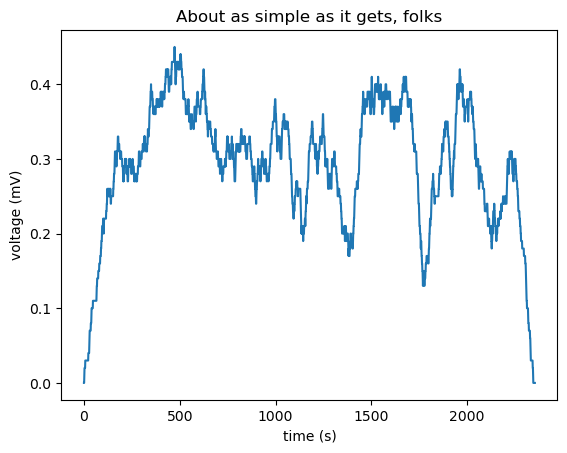

In [22]:
import matplotlib.pyplot as plt
x = np.convolve(results['Recall@20'],np.ones(100))/100
t = np.arange(0, len(x))

fig, ax = plt.subplots()
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.plot(t, x)
plt.show()

## Sampled datasets

### ppf2_sample5_1

In [20]:
sys.path.append('./')
configPath = 'config'
dataPath = 'ppf2_sample5_1.csv'

Data = []
data = pd.read_csv("ppf2_sample5_1.csv")
print(data)
Data = data.values.tolist()

Data = Data[1:]

      Unnamed: 0     V1      V2
0             56    472   15116
1             57    472    4109
2             58    472    1697
3             59    472    6271
4            240    472   19237
...          ...    ...     ...
5889      111401  77607  107867
5890      111402  77607  103739
5891      111403  77607  103741
5892      111451  68410  103205
5893      111942  88921  104352

[5894 rows x 3 columns]


In [21]:
Data_Transpose = np.transpose(Data)
stream = ImplicitData(Data_Transpose[1],Data_Transpose[2])



num_clusters = 8
cl_num_iterations = 30
cl_learn_rate =0.01
cl_regularization = 0
num_factors = 90
num_iter = 8
learn_rate = 0.3
regularization = 0.4
model = ICE_NMF(ImplicitData([],[]), num_clusters, cl_num_iterations, cl_learn_rate, cl_regularization, 
    num_factors, num_iter, learn_rate, regularization, random_seed = 100)
eval = EvalPrequential(model,stream, metrics = ["Recall@20"])


start time 2022-09-20 20:46:55.820688
npmean(resuls[Recall@20]) 0.0632279534109817
end time 2022-09-20 20:47:25.233458
run time 0:00:29.412770

get tuple 2.7092247973794385e-06
recommend 0.02691382536673903
eval_point 1.6944380647529182e-05
update 0.0022382744702219904


In [ ]:
%%capture out

start_recommend = datetime.now()
print('start time', start_recommend)

results=eval.EvaluateTime(0,stream.size, 1)

print('npmean(resuls[Recall@20])', np.mean(results['Recall@20']))
end_recommend = datetime.now()
print('end time', end_recommend)

tempo = end_recommend - start_recommend

print('run time', tempo)
print('')
print('get tuple',np.mean(results['time_get_tuple']))
print('recommend',np.mean(results['time_recommend']))
print('eval_point',np.mean(results['time_eval_point']))
print('update',np.mean(results['time_update'])) 

In [ ]:
print(out)

### ppf2_sample5_2

In [22]:
sys.path.append('./')
configPath = 'config'
dataPath = 'ppf2_sample5_1.csv'

Data = []
data = pd.read_csv("ppf2_sample5_2.csv")
print(data)
Data = data.values.tolist()

Data = Data[1:]

      Unnamed: 0     V1      V2
0              3   8426   21676
1              4   8426   21416
2              8   8446    1980
3              9   8446    1983
4             10   8446   20747
...          ...    ...     ...
5268      110931  80093  124395
5269      111436  88465   65893
5270      111640  66305  124259
5271      111786  88061  111043
5272      111793  88790   66663

[5273 rows x 3 columns]


In [23]:
Data_Transpose = np.transpose(Data)
stream = ImplicitData(Data_Transpose[1],Data_Transpose[2])



num_clusters = 8
cl_num_iterations = 30
cl_learn_rate =0.01
cl_regularization = 0
num_factors = 90
num_iter = 8
learn_rate = 0.3
regularization = 0.4
model = ICE_NMF(ImplicitData([],[]), num_clusters, cl_num_iterations, cl_learn_rate, cl_regularization, 
    num_factors, num_iter, learn_rate, regularization, random_seed = 100)
eval = EvalPrequential(model,stream, metrics = ["Recall@20"])
start_recommend = datetime.now()
print('start time', start_recommend)

results=eval.EvaluateTime(0,stream.size, 10)

print('npmean(resuls[Recall@20])', np.mean(results['Recall@20']))
end_recommend = datetime.now()
print('end time', end_recommend)

tempo = end_recommend - start_recommend

print('run time', tempo)
print('')
print('get tuple',np.mean(results['time_get_tuple']))
print('recommend',np.mean(results['time_recommend']))
print('eval_point',np.mean(results['time_eval_point']))
print('update',np.mean(results['time_update'])) 

start time 2022-09-20 20:47:25.447506
npmean(resuls[Recall@20]) 0.03896103896103896
end time 2022-09-20 20:47:49.887314
run time 0:00:24.439808

get tuple 2.617358437800082e-06
recommend 0.023826639815916158
eval_point 1.598023749017096e-05
update 0.002191963072792713


### ppf2_sample5_3

In [24]:
sys.path.append('./')
configPath = 'config'
dataPath = 'ppf2_sample5_1.csv'

Data = []
data = pd.read_csv("ppf2_sample5_3.csv")
print(data)
Data = data.values.tolist()

Data = Data[1:]

      Unnamed: 0     V1      V2
0             21    385     322
1            103    770   14147
2            104    770    8876
3            105    770   13597
4            106    770    8404
...          ...    ...     ...
4995      110987  88064  124941
4996      111311  62022  119481
4997      111312  62022   98014
4998      111313  77381   83225
4999      111618  30920  124201

[5000 rows x 3 columns]


In [25]:
Data_Transpose = np.transpose(Data)
stream = ImplicitData(Data_Transpose[1],Data_Transpose[2])



num_clusters = 8
cl_num_iterations = 30
cl_learn_rate =0.01
cl_regularization = 0
num_factors = 90
num_iter = 8
learn_rate = 0.3
regularization = 0.4
model = ICE_NMF(ImplicitData([],[]), num_clusters, cl_num_iterations, cl_learn_rate, cl_regularization, 
    num_factors, num_iter, learn_rate, regularization, random_seed = 100)
eval = EvalPrequential(model,stream, metrics = ["Recall@20"])
start_recommend = datetime.now()
print('start time', start_recommend)

results=eval.EvaluateTime(0,stream.size, 10)

print('npmean(resuls[Recall@20])', np.mean(results['Recall@20']))
end_recommend = datetime.now()
print('end time', end_recommend)

tempo = end_recommend - start_recommend

print('run time', tempo)
print('')
print('get tuple',np.mean(results['time_get_tuple']))
print('recommend',np.mean(results['time_recommend']))
print('eval_point',np.mean(results['time_eval_point']))
print('update',np.mean(results['time_update'])) 

start time 2022-09-20 20:47:50.283071
npmean(resuls[Recall@20]) 0.064
end time 2022-09-20 20:48:13.300714
run time 0:00:23.017643

get tuple 2.5479167336152778e-06
recommend 0.024617178916931153
eval_point 1.6171455383300782e-05
update 0.002134571268120201


### ppf2_sample5_4

In [26]:
sys.path.append('./')
configPath = 'config'
dataPath = 'ppf2_sample5_1.csv'

Data = []
data = pd.read_csv("ppf2_sample5_4.csv")
print(data)
Data = data.values.tolist()

Data = Data[1:]

      Unnamed: 0     V1      V2
0             19   8521   22806
1             20   8521   22800
2            125   8346   25979
3            645    144   16642
4            699   8626   25104
...          ...    ...     ...
4593      111660  88622  119213
4594      111661  88622  119214
4595      111763  88717    1475
4596      111764  88717   19250
4597      111776  74650  125991

[4598 rows x 3 columns]


In [27]:
Data_Transpose = np.transpose(Data)
stream = ImplicitData(Data_Transpose[1],Data_Transpose[2])



num_clusters = 8
cl_num_iterations = 30
cl_learn_rate =0.01
cl_regularization = 0
num_factors = 90
num_iter = 8
learn_rate = 0.3
regularization = 0.4
model = ICE_NMF(ImplicitData([],[]), num_clusters, cl_num_iterations, cl_learn_rate, cl_regularization, 
    num_factors, num_iter, learn_rate, regularization, random_seed = 100)
eval = EvalPrequential(model,stream, metrics = ["Recall@20"])
start_recommend = datetime.now()
print('start time', start_recommend)

results=eval.EvaluateTime(0,stream.size, 10)

print('npmean(resuls[Recall@20])', np.mean(results['Recall@20']))
end_recommend = datetime.now()
print('end time', end_recommend)

tempo = end_recommend - start_recommend

print('run time', tempo)
print('')
print('get tuple',np.mean(results['time_get_tuple']))
print('recommend',np.mean(results['time_recommend']))
print('eval_point',np.mean(results['time_eval_point']))
print('update',np.mean(results['time_update'])) 

start time 2022-09-20 20:48:13.825972
npmean(resuls[Recall@20]) 0.03456221198156682
end time 2022-09-20 20:48:34.374964
run time 0:00:20.548992

get tuple 2.790124929285786e-06
recommend 0.022720791777158113
eval_point 1.654811718496859e-05
update 0.002316733923118115


### ppf2_sample5_5

In [28]:
sys.path.append('./')
configPath = 'config'
dataPath = 'ppf2_sample5_1.csv'

Data = []
data = pd.read_csv("ppf2_sample5_5.csv")
print(data)
Data = data.values.tolist()

Data = Data[1:]

      Unnamed: 0     V1      V2
0            386   8294   19054
1            522    727   26782
2            523    727   26807
3            524    727   26808
4            784   7771   25113
...          ...    ...     ...
6153      111838  88578   13748
6154      111839  88578   16453
6155      111840  88578   90526
6156      111889  88884   91169
6157      111941  88578  123756

[6158 rows x 3 columns]


In [29]:
Data_Transpose = np.transpose(Data)
stream = ImplicitData(Data_Transpose[1],Data_Transpose[2])



num_clusters = 8
cl_num_iterations = 30
cl_learn_rate =0.01
cl_regularization = 0
num_factors = 90
num_iter = 8
learn_rate = 0.3
regularization = 0.4
model = ICE_NMF(ImplicitData([],[]), num_clusters, cl_num_iterations, cl_learn_rate, cl_regularization, 
    num_factors, num_iter, learn_rate, regularization, random_seed = 100)
eval = EvalPrequential(model,stream, metrics = ["Recall@20"])
start_recommend = datetime.now()
print('start time', start_recommend)

results=eval.EvaluateTime(0,stream.size, 10)

print('npmean(resuls[Recall@20])', np.mean(results['Recall@20']))
end_recommend = datetime.now()
print('end time', end_recommend)

tempo = end_recommend - start_recommend

print('run time', tempo)
print('')
print('get tuple',np.mean(results['time_get_tuple']))
print('recommend',np.mean(results['time_recommend']))
print('eval_point',np.mean(results['time_eval_point']))
print('update',np.mean(results['time_update'])) 

start time 2022-09-20 20:48:35.413110
npmean(resuls[Recall@20]) 0.03968253968253968
end time 2022-09-20 20:49:07.639730
run time 0:00:32.226620

get tuple 2.510462059726068e-06
recommend 0.03056996701255677
eval_point 1.632372538248698e-05
update 0.002098632629416836
